In [12]:
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
from com.sbk.dspbase.signals.sinus import Sinus
from com.sbk.dspbase.dft import dft
from com.sbk.dspbase.polar import cart_to_polar
from numpy import sin,pi,linspace,arange,log10



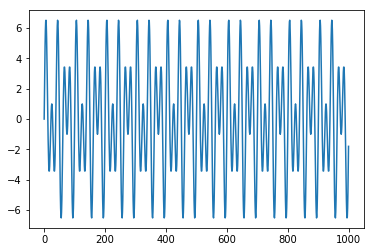

<p>Failed to display Jupyter Widget of type <code>interactive</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

ValueError: operands could not be broadcast together with shapes (100,) (1000,) (100,) 

<function __main__.update>

In [15]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
s =  Sinus.build_sin_waves(1000,3,30,4,50)
line, = ax.plot(s)


def update(f1=5, a1=10.0, f2=2, a2=50):
    s = Sinus.build_sin_waves(100,f1, a1, f2, a2)
    line.set_ydata(s)
    fig.canvas.draw()


interact(update)


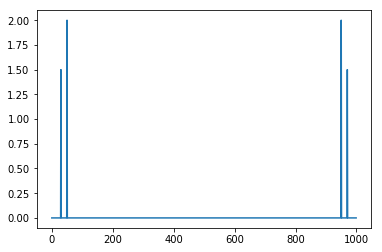

In [16]:
#s = Sinus.build_sin_waves(1000,3,100,4,300)
ft = np.fft.fft(s)/len(s)
#plt.plot(20*log10(abs(ft)))
plt.plot(abs(ft))
plt.show()